In [973]:
# Read the dataset
import pandas as pd
import numpy as np
dataset = pd.read_csv("/Users/vb/Desktop/Projects/Machine-Learning/05-Stock-Trend-Prediction/data/artifact/2024-04-01-12-47-59/data_processing/processed_data.csv")

In [974]:
data_train = pd.DataFrame(dataset['Close'][0:int(len(dataset)*0.70)])
data_test = pd.DataFrame(dataset['Close'][int(len(dataset)*0.70):int(len(dataset))])

In [975]:
data_train.shape

(1724, 1)

In [976]:
data_test.shape

(740, 1)

In [977]:
data_train.head()

,Close
0,174.059006
1,177.850586
2,174.293381
3,174.900055
4,176.701599


In [978]:
data_test.head()

,Close
1724,338.357513
1725,335.486420
1726,343.142639
1727,340.319397
1728,337.831116


In [979]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data_train_arr = scaler.fit_transform(data_train)
data_train_arr.shape

(1724, 1)

In [980]:
data_train_arr[:10]

array([[0.12517391],
       [0.14002829],
       [0.12609213],
       [0.12846892],
       [0.13552688],
       [0.15806954],
       [0.17357217],
       [0.16136454],
       [0.15052533],
       [0.14885084]])

In [981]:
x_train = []
y_train = []

for i in range(100, data_train_arr.shape[0]):
    x_train.append(data_train_arr[i-100:i])
    y_train.append(data_train_arr[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [982]:
print(x_train.shape)
print(y_train.shape)

(1624, 100, 1)
(1624,)


In [983]:
x_train[:20]

array([[[0.12517391],
        [0.14002829],
        [0.12609213],
        ...,
        [0.35767389],
        [0.35095536],
        [0.34727914]],

       [[0.14002829],
        [0.12609213],
        [0.12846892],
        ...,
        [0.35095536],
        [0.34727914],
        [0.35053875]],

       [[0.12609213],
        [0.12846892],
        [0.13552688],
        ...,
        [0.34727914],
        [0.35053875],
        [0.33449392]],

       ...,

       [[0.18716621],
        [0.19177559],
        [0.18082842],
        ...,
        [0.37131026],
        [0.39233541],
        [0.37335664]],

       [[0.19177559],
        [0.18082842],
        [0.17951392],
        ...,
        [0.39233541],
        [0.37335664],
        [0.38550808]],

       [[0.18082842],
        [0.17951392],
        [0.18226875],
        ...,
        [0.37335664],
        [0.38550808],
        [0.3690828 ]]])

In [984]:
y_train[:20]

array([0.35053875, 0.33449392, 0.35030346, 0.35669607, 0.35053875,
       0.34371166, 0.35443239, 0.37259606, 0.37312117, 0.36681918,
       0.38606953, 0.39595728, 0.39336756, 0.37158196, 0.37131026,
       0.39233541, 0.37335664, 0.38550808, 0.3690828 , 0.34378406])

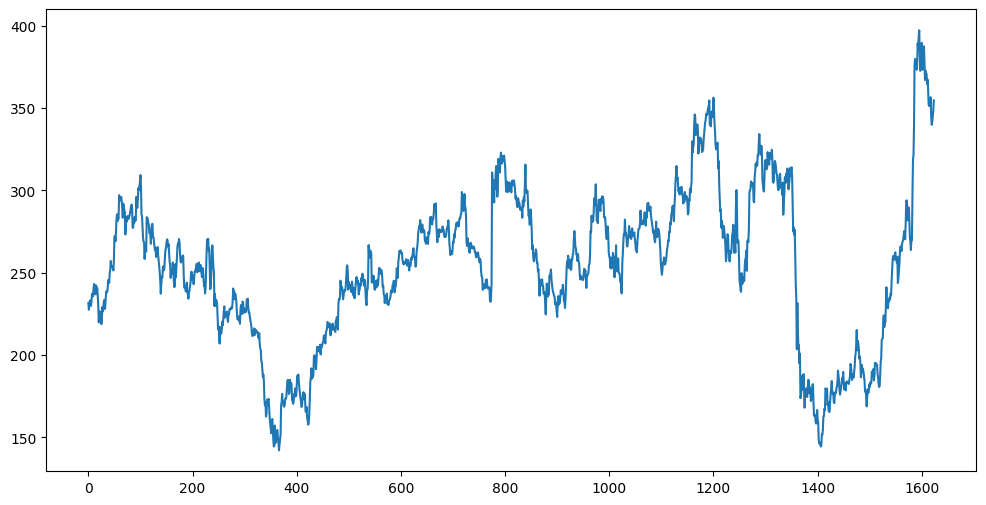

In [985]:
import matplotlib.pyplot as plt


y_train_fig = y_train.reshape(-1, 1)
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_train_fig))

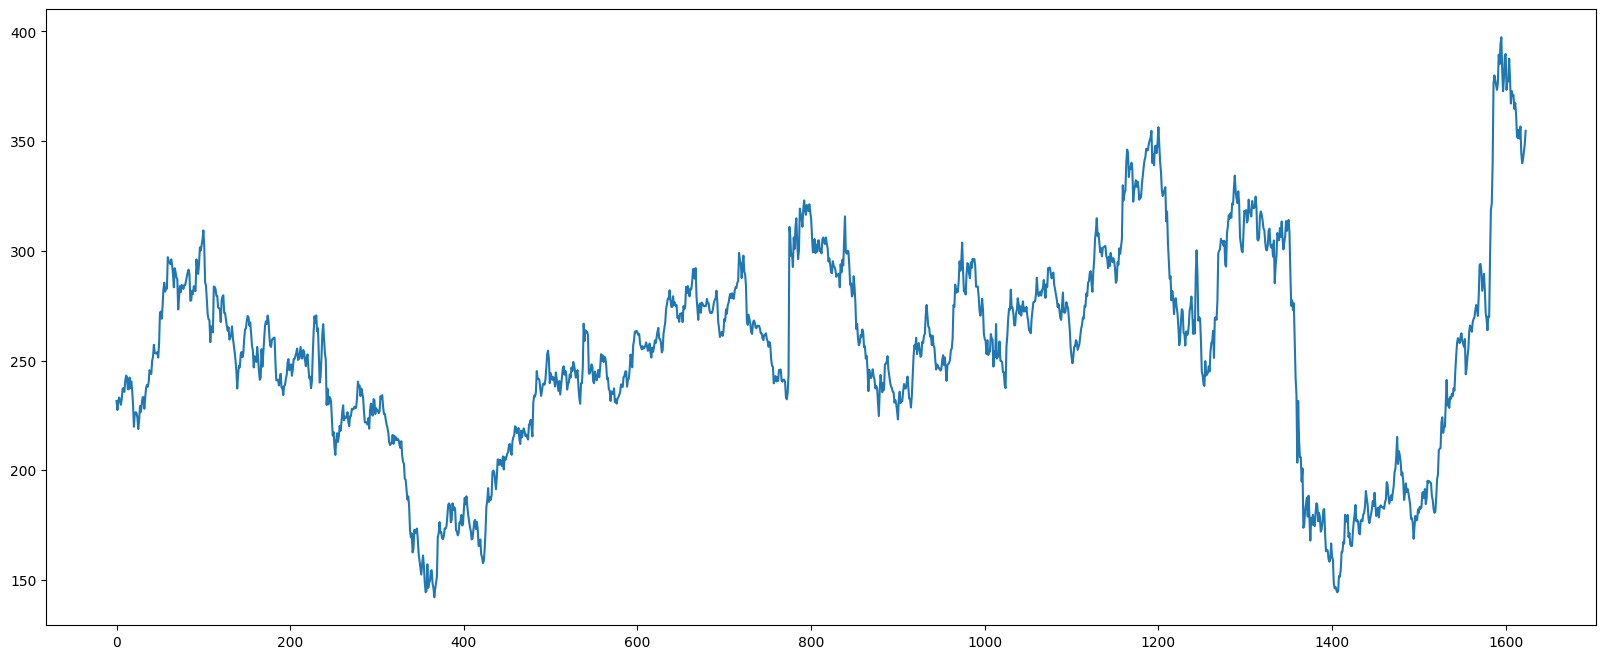

In [986]:
plt.figure(figsize=(20, 8))
y_train = y_train.reshape(-1, 1)
plt.plot(scaler.inverse_transform(y_train))
plt.show()

In [987]:
# ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [988]:
model = Sequential()

In [989]:
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [990]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_48 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_49 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_49 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_50 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_50 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_51 (LSTM)              (None, 120)             

In [991]:
model.compile(optimizer="adam", loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50


51/51 [==============================] - 7s 109ms/step - loss: 0.0478
Epoch 2/50
51/51 [==============================] - 6s 108ms/step - loss: 0.0124
Epoch 3/50
51/51 [==============================] - 6s 111ms/step - loss: 0.0112
Epoch 4/50
51/51 [==============================] - 6s 111ms/step - loss: 0.0104
Epoch 5/50
51/51 [==============================] - 6s 111ms/step - loss: 0.0085
Epoch 6/50
51/51 [==============================] - 6s 112ms/step - loss: 0.0080
Epoch 7/50
51/51 [==============================] - 6s 113ms/step - loss: 0.0077
Epoch 8/50
51/51 [==============================] - 6s 112ms/step - loss: 0.0077
Epoch 9/50
51/51 [==============================] - 6s 112ms/step - loss: 0.0070
Epoch 10/50
51/51 [==============================] - 6s 112ms/step - loss: 0.0070
Epoch 11/50
51/51 [==============================] - 6s 112ms/step - loss: 0.0069
Epoch 12/50
51/51 [==============================] - 6s 114ms/step - loss: 0.0066
Epoch 13/50
51/51 [=================

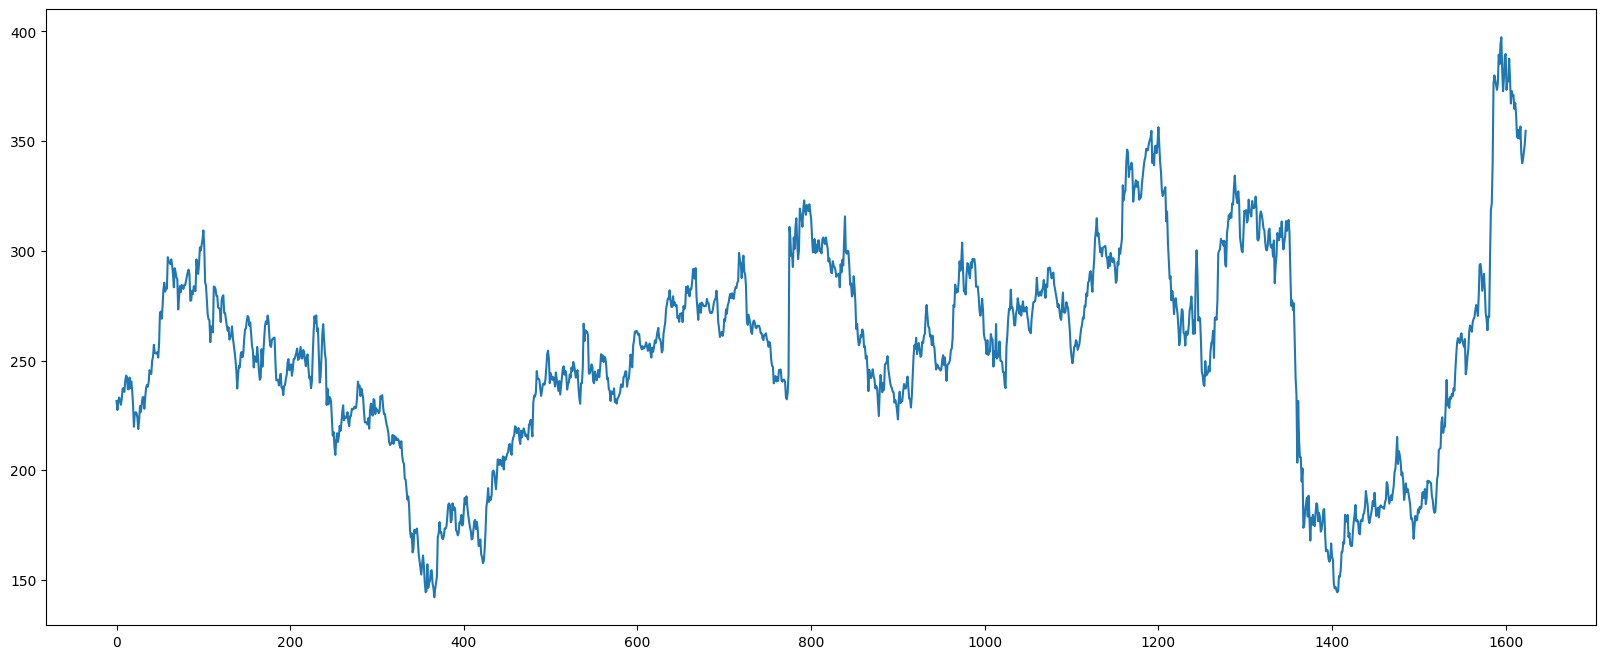

In [992]:
plt.figure(figsize=(20, 8))
plt.plot(scaler.inverse_transform(y_train))

In [993]:
y_train.shape

(1624, 1)

In [994]:
model.save("model_1.h5")

/Users/vb/Desktop/Projects/Machine-Learning/05-Stock-Trend-Prediction/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


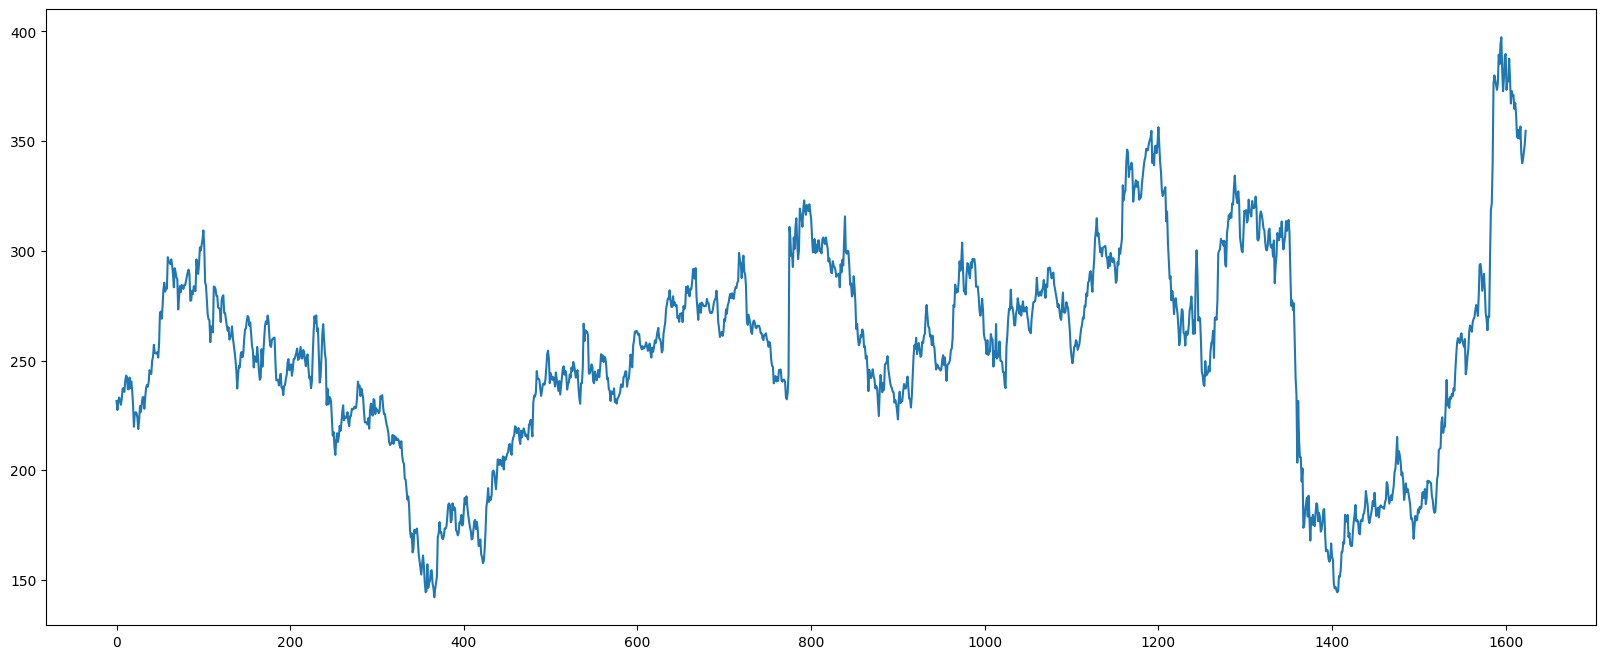

In [995]:
plt.figure(figsize=(20, 8))
plt.plot(scaler.inverse_transform(y_train))

In [996]:
past_100_days = data_train.tail(100)

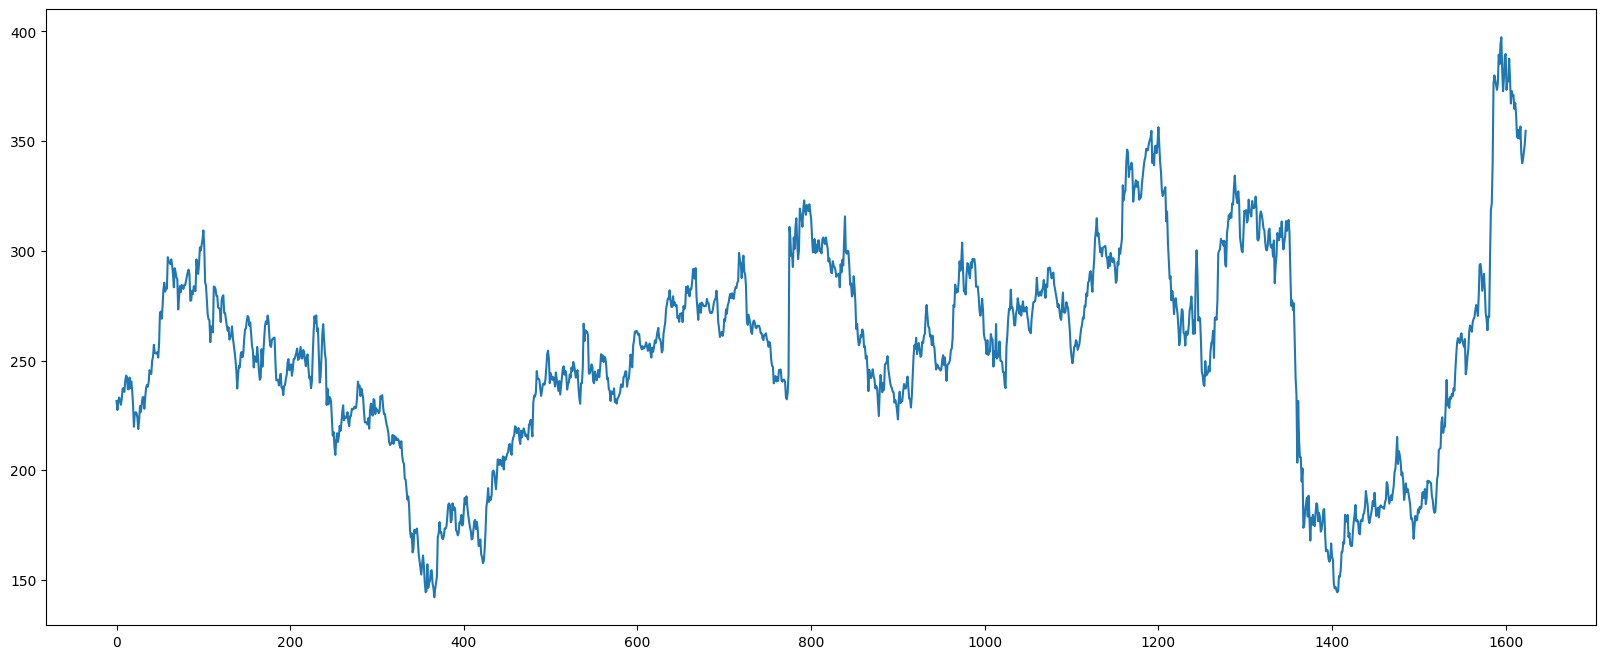

In [997]:
plt.figure(figsize=(20, 8))
plt.plot(scaler.inverse_transform(y_train))

In [998]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

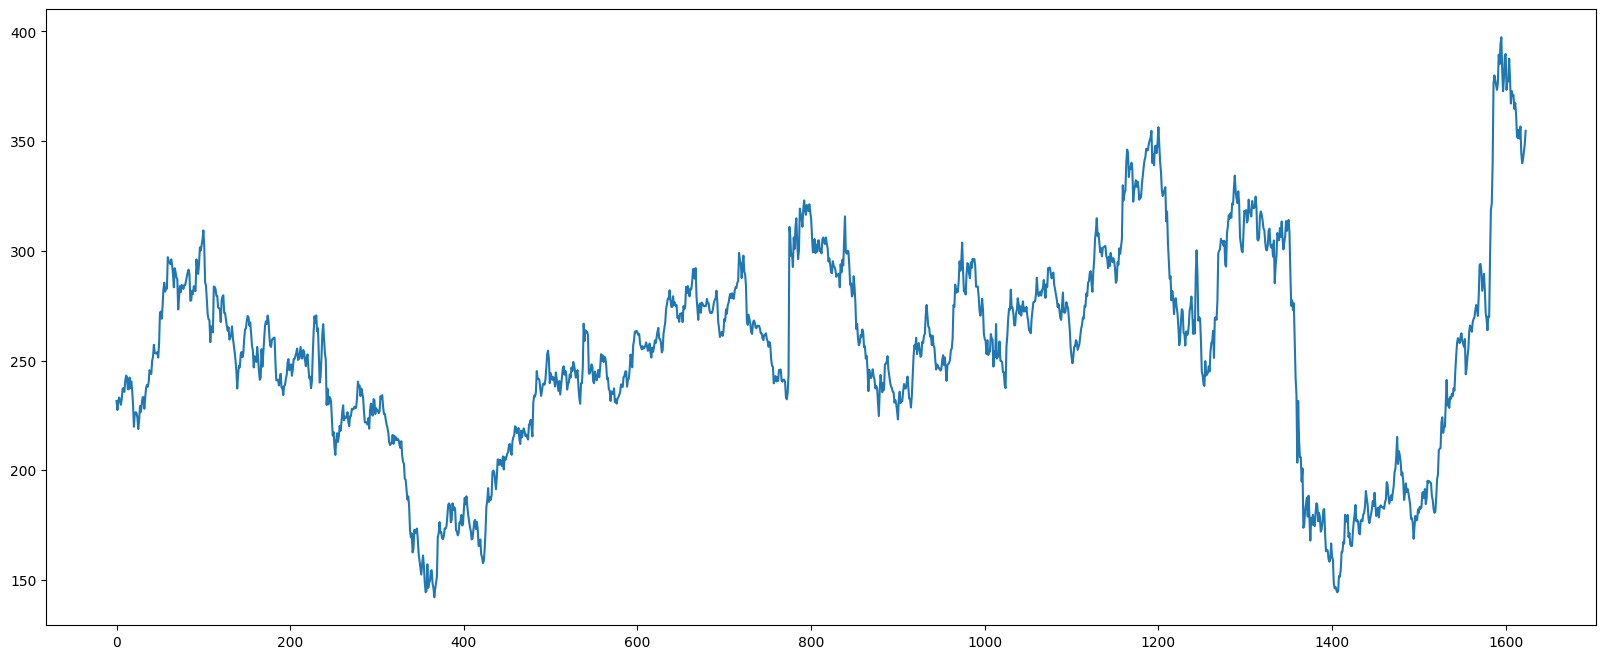

In [999]:
plt.figure(figsize=(20, 8))
plt.plot(scaler.inverse_transform(y_train))

In [1000]:
final_df.head()

,Close
0,209.780701
1,210.067795
2,221.743561
3,224.136124
4,217.054108


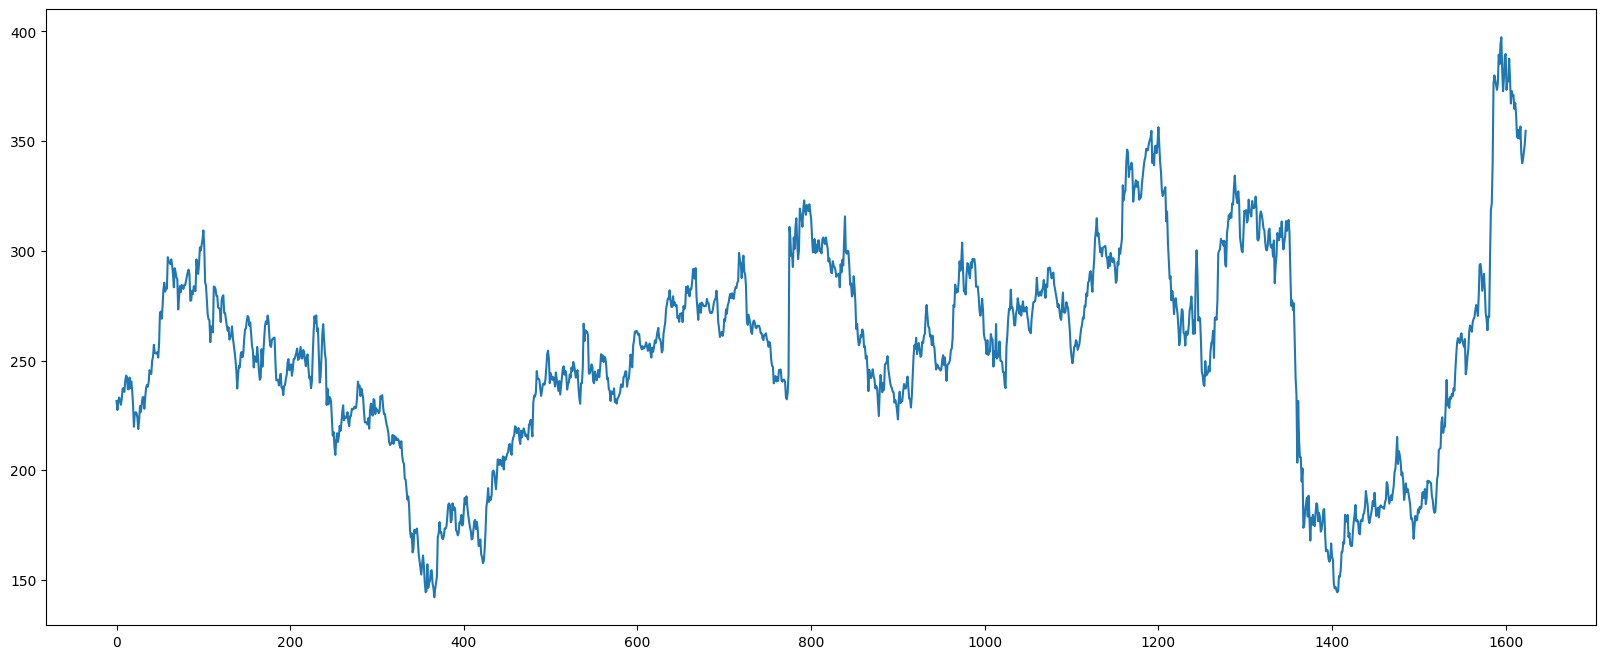

In [1001]:
plt.figure(figsize=(20, 8))
y_train = scaler.inverse_transform(y_train)
plt.plot(y_train)

In [1002]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00000000e+00],
       [4.96471320e-04],
       [2.06873517e-02],
       [2.48248062e-02],
       [1.25778891e-02],
       [1.69635925e-02],
       [1.72945910e-02],
       [3.47547339e-02],
       [5.42835910e-02],
       [3.40099874e-02],
       [3.89749644e-02],
       [3.22722454e-02],
       [4.07954296e-02],
       [3.93886861e-02],
       [4.34434174e-02],
       [4.14574266e-02],
       [4.77463712e-02],
       [4.59259059e-02],
       [6.14000053e-02],
       [7.33159239e-02],
       [8.34114037e-02],
       [8.72177805e-02],
       [8.46526479e-02],
       [8.33286540e-02],
       [8.81280791e-02],
       [9.10243685e-02],
       [8.51490929e-02],
       [8.30804052e-02],
       [8.02669182e-02],
       [8.64731395e-02],
       [5.87520439e-02],
       [6.33033257e-02],
       [7.24884541e-02],
       [7.88601747e-02],
       [9.26793081e-02],
       [9.71477874e-02],
       [9.54927423e-02],
       [9.22656128e-02],
       [9.96302760e-02],
       [1.02360908e-01],


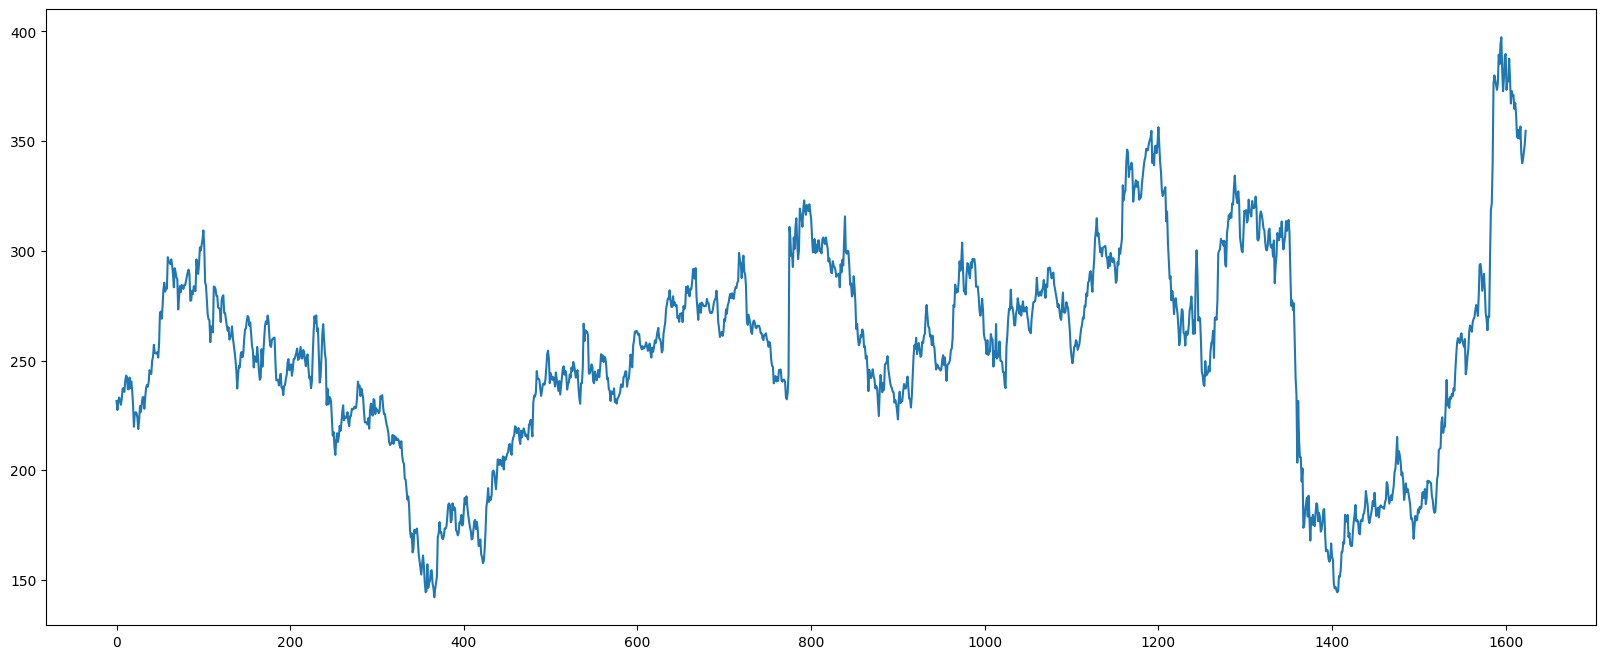

In [1003]:
plt.figure(figsize=(20, 8))
plt.plot(y_train)

In [1004]:
input_data.shape

(840, 1)

In [1005]:
y_train.shape

(1624, 1)

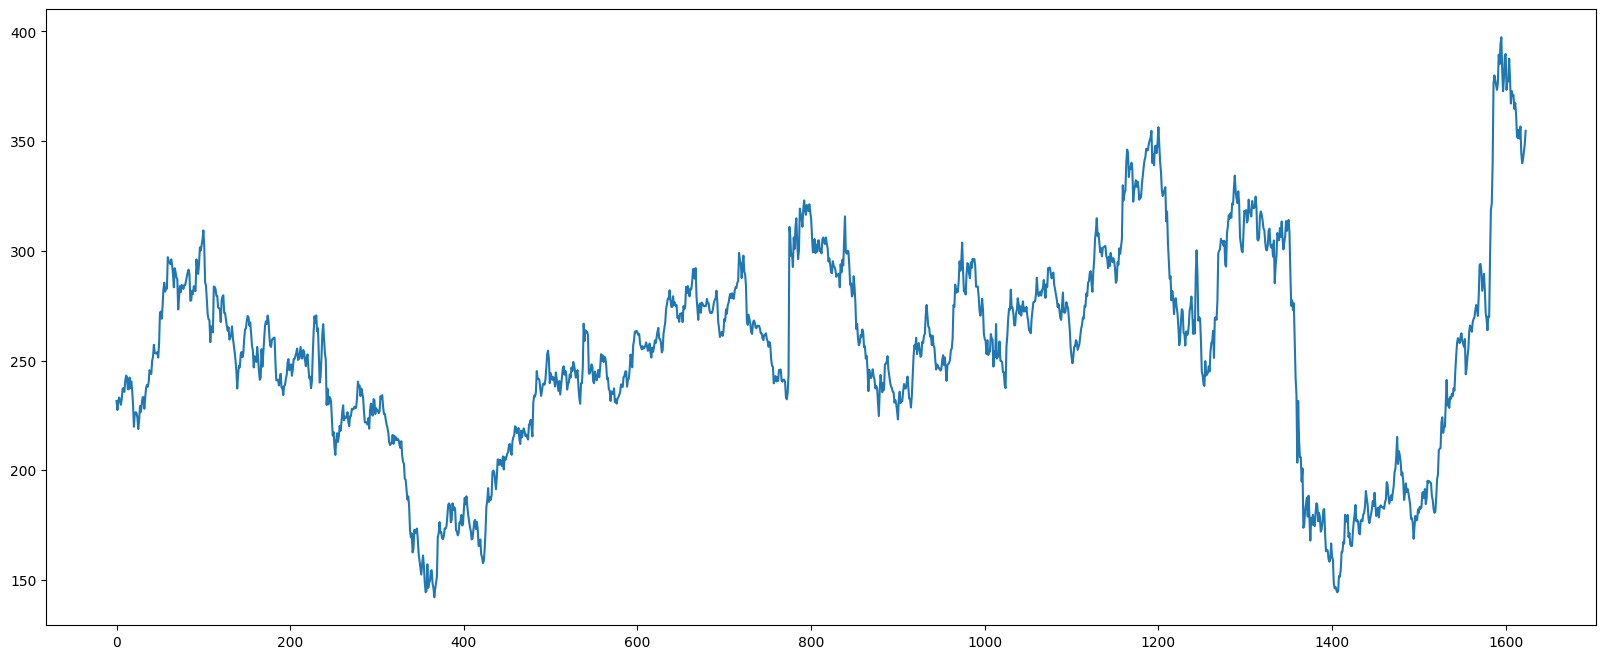

In [1006]:
plt.figure(figsize=(20, 8))
plt.plot(y_train)

In [1007]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [1008]:
print(x_test.shape)
print(y_test.shape)

(740, 100, 1)
(740,)


In [1009]:
# Making Predictions
y_predicted = model.predict(x_test)

24/24 [==============================] - 1s 28ms/step


In [1010]:
y_predicted.shape

(740, 1)

In [1011]:
y_test

array([0.22234764, 0.21738267, 0.23062255, 0.22574032, 0.22143734,
       0.18146944, 0.20157754, 0.20439103, 0.199757  , 0.18527587,
       0.18254518, 0.19437838, 0.19404738, 0.20703896, 0.22152004,
       0.23864926, 0.2320293 , 0.22226489, 0.21746542, 0.21895491,
       0.22540933, 0.22565757, 0.23012611, 0.23583578, 0.24071795,
       0.24576573, 0.23376704, 0.27125256, 0.26984576, 0.273404  ,
       0.27365219, 0.30120782, 0.31916438, 0.31966093, 0.32164692,
       0.34092748, 0.3357143 , 0.33952073, 0.35309162, 0.36087008,
       0.37155982, 0.36145471, 0.35919984, 0.35076502, 0.34116095,
       0.35919984, 0.35477363, 0.35602633, 0.3546066 , 0.34867718,
       0.33915659, 0.32688015, 0.3383215 , 0.33648417, 0.33681823,
       0.33406232, 0.35343739, 0.35001331, 0.34124444, 0.33740286,
       0.33940716, 0.34608824, 0.35986796, 0.35502415, 0.36020201,
       0.34617173, 0.34500258, 0.35118257, 0.35393848, 0.35719548,
       0.3582812 , 0.35544175, 0.35193412, 0.34024226, 0.34216

In [1012]:
y_predicted

array([[0.2119619 ],
       [0.21258615],
       [0.2127735 ],
       [0.21244848],
       [0.21174708],
       [0.21075282],
       [0.20849687],
       [0.20507565],
       [0.20116718],
       [0.19740236],
       [0.19382904],
       [0.19039896],
       [0.18754272],
       [0.1856252 ],
       [0.1852089 ],
       [0.186932  ],
       [0.1912272 ],
       [0.19738592],
       [0.20381163],
       [0.20910175],
       [0.21257201],
       [0.21436834],
       [0.21496972],
       [0.21501076],
       [0.2151312 ],
       [0.21580388],
       [0.21725902],
       [0.21887742],
       [0.2215151 ],
       [0.22579855],
       [0.23202069],
       [0.23995323],
       [0.25039557],
       [0.2649859 ],
       [0.28162777],
       [0.29774636],
       [0.31264487],
       [0.3253026 ],
       [0.33527133],
       [0.34339857],
       [0.350918  ],
       [0.35887468],
       [0.36575288],
       [0.3703176 ],
       [0.3719792 ],
       [0.37075898],
       [0.36864617],
       [0.367

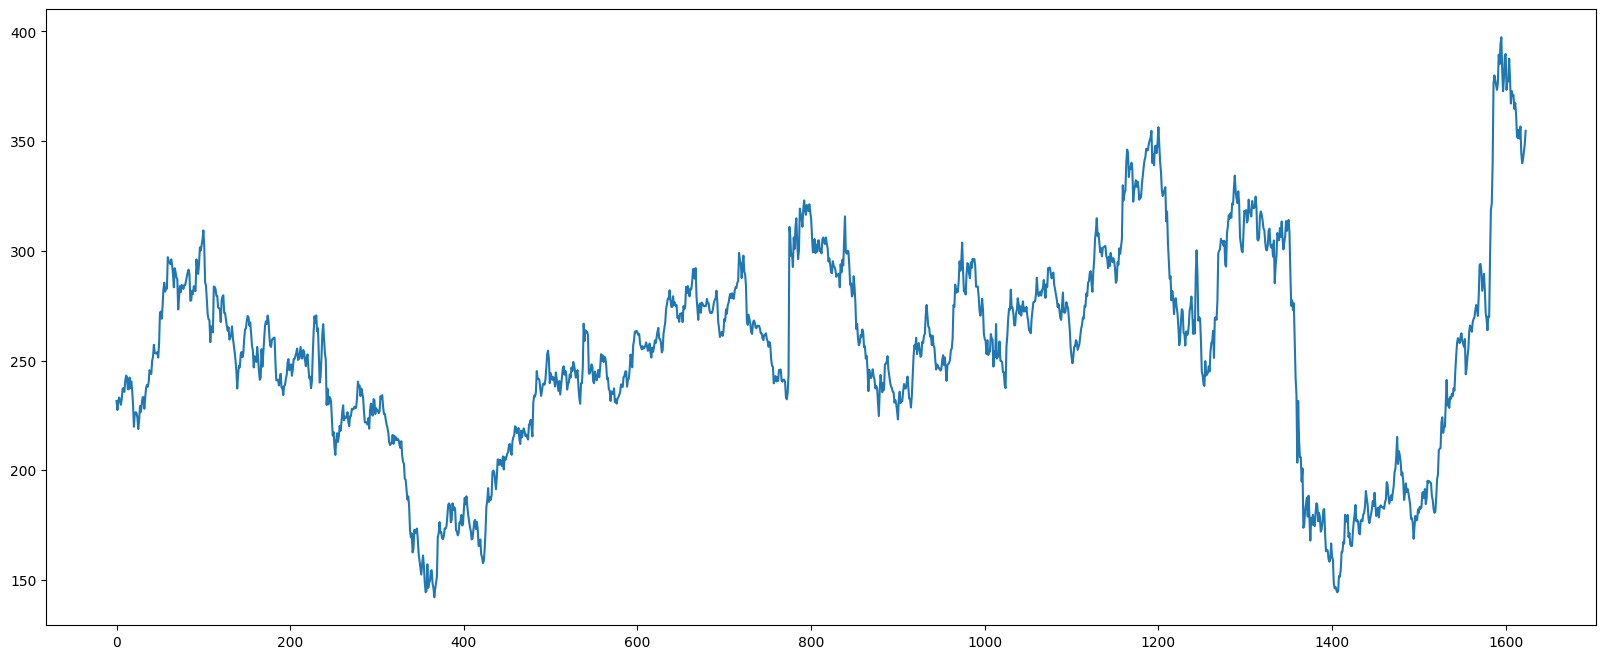

In [1013]:
plt.figure(figsize=(20, 8))
plt.plot(y_train)

In [1014]:
scaler.scale_

array([0.0017293])

In [1015]:
y_predicted = scaler.inverse_transform(y_predicted)

In [1016]:
# Reshape y_test to a 2D array
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

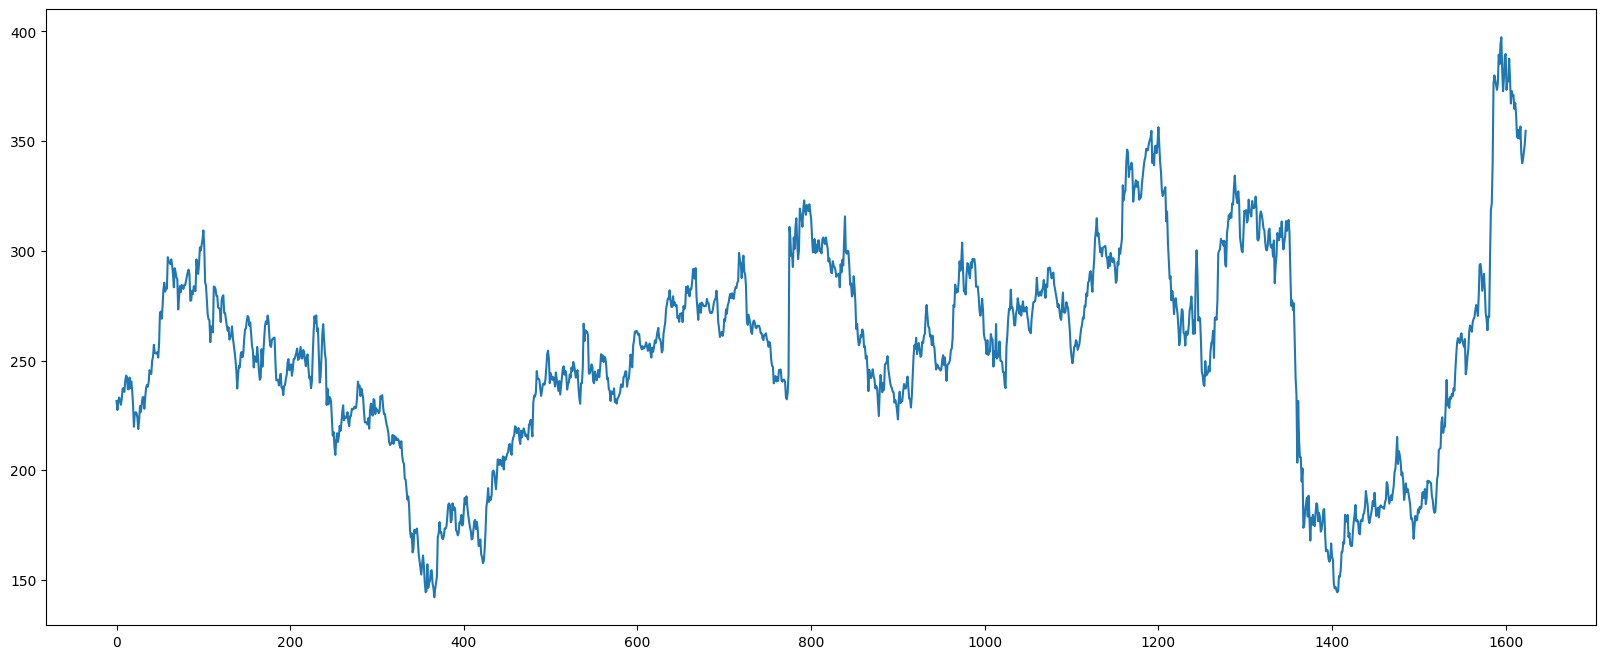

In [1017]:
plt.figure(figsize=(20, 8))
plt.plot(y_train)

In [1018]:
y_test

array([[338.35751343],
       [335.48641968],
       [343.14263916],
       [340.31939697],
       [337.83111572],
       [314.71890259],
       [326.34680176],
       [327.97375488],
       [325.29403687],
       [316.92004395],
       [315.3409729 ],
       [322.18374634],
       [321.99234009],
       [329.50497437],
       [337.87893677],
       [347.78424072],
       [343.95611572],
       [338.30966187],
       [335.53427124],
       [336.39559937],
       [340.12799072],
       [340.27154541],
       [342.8555603 ],
       [346.1572876 ],
       [348.98049927],
       [351.8994751 ],
       [344.96099854],
       [366.63772583],
       [365.82421875],
       [367.88183594],
       [368.02536011],
       [383.95993042],
       [394.34365845],
       [394.63079834],
       [395.77923584],
       [406.92858887],
       [403.91397095],
       [406.1151123 ],
       [413.96273804],
       [418.46078491],
       [424.64233398],
       [418.79885864],
       [417.49493408],
       [412

In [1019]:
y_predicted

array([[332.35178],
       [332.71274],
       [332.82108],
       [332.63312],
       [332.22754],
       [331.6526 ],
       [330.34802],
       [328.36966],
       [326.10953],
       [323.9324 ],
       [321.8661 ],
       [319.88257],
       [318.2309 ],
       [317.12204],
       [316.88132],
       [317.87775],
       [320.3615 ],
       [323.92294],
       [327.6387 ],
       [330.69785],
       [332.70456],
       [333.74332],
       [334.0911 ],
       [334.1148 ],
       [334.18448],
       [334.5735 ],
       [335.41492],
       [336.3508 ],
       [337.87607],
       [340.35306],
       [343.95117],
       [348.5383 ],
       [354.57678],
       [363.01392],
       [372.6374 ],
       [381.95825],
       [390.57364],
       [397.8932 ],
       [403.6578 ],
       [408.35754],
       [412.70578],
       [417.3069 ],
       [421.28433],
       [423.924  ],
       [424.88486],
       [424.17923],
       [422.95746],
       [422.23035],
       [422.4173 ],
       [423.25455],


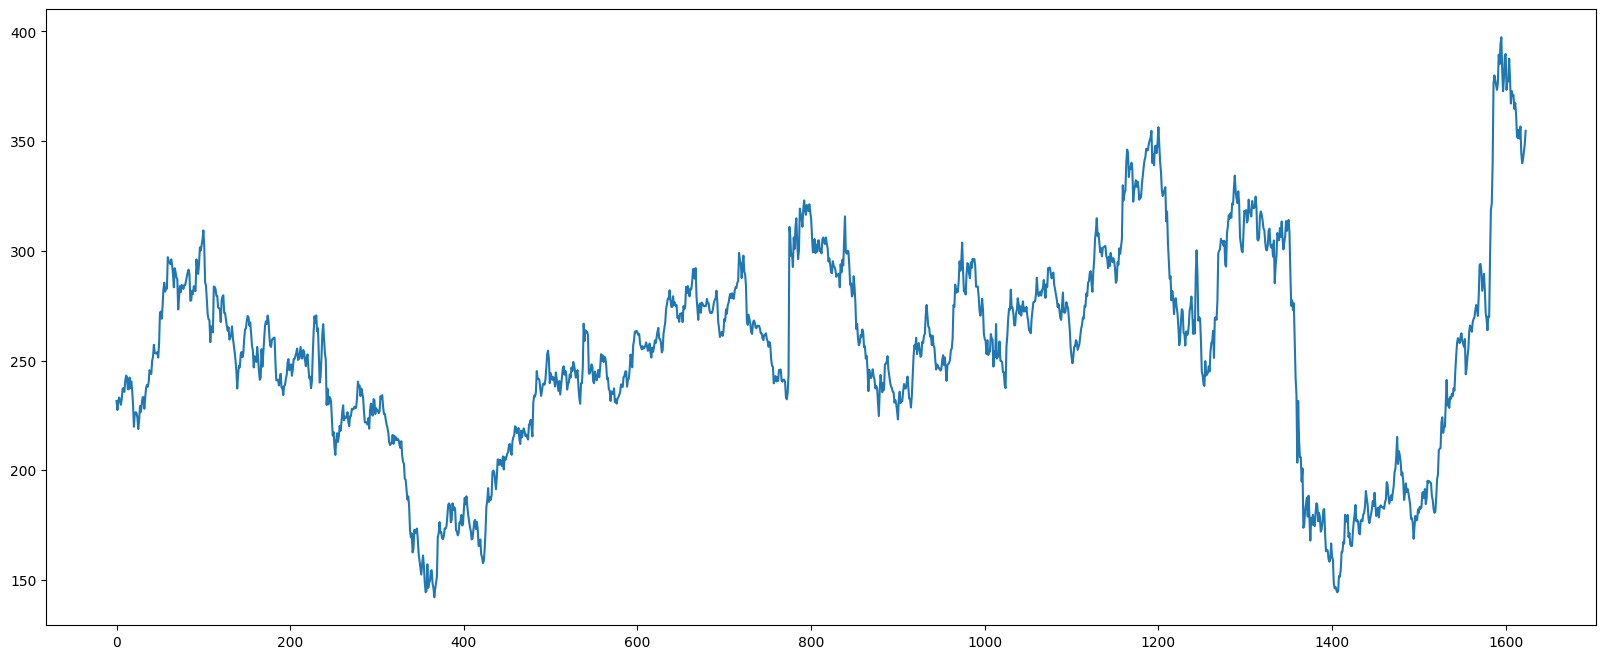

In [1020]:
plt.figure(figsize=(20, 8))
plt.plot(y_train)

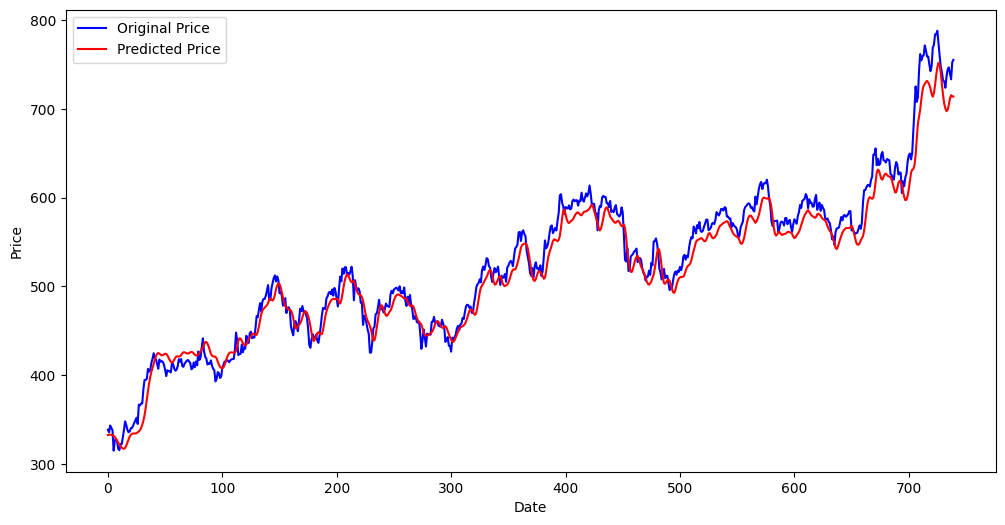

In [1021]:
import matplotlib.pyplot as plt

# y_test = y_test.reshape(-1, 1)
# y_test = scaler.inverse_transform(y_test)
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [1022]:
graph_data = pd.DataFrame()
graph_data['Test'] = pd.DataFrame(y_test)

In [1023]:
graph_data['Pred'] = pd.DataFrame(y_predicted)
graph_data.head()

,Test,Pred
0,338.357513,332.351776
1,335.486420,332.712738
2,343.142639,332.821075
3,340.319397,332.633118
4,337.831116,332.227539


In [1024]:
graph_data[['Test', 'Pred']].head()

,Test,Pred
0,338.357513,332.351776
1,335.486420,332.712738
2,343.142639,332.821075
3,340.319397,332.633118
4,337.831116,332.227539


In [1025]:
data_train[-10:]

,Close
1714,351.325226
1715,355.201202
1716,351.229523
1717,356.684631
1718,344.386810
1719,339.936615
1720,341.850647
1721,345.295959
1722,348.645538
1723,354.722687


In [1032]:
np.array(data_train[:100])

array([[174.05900574],
       [177.85058594],
       [174.29338074],
       [174.90005493],
       [176.70159912],
       [182.45561218],
       [186.41265869],
       [183.29666138],
       [180.529953  ],
       [180.10253906],
       [185.42456055],
       [190.46162415],
       [188.29696655],
       [189.82737732],
       [189.82737732],
       [191.6703186 ],
       [193.59596252],
       [189.88253784],
       [191.05908203],
       [188.26481628],
       [187.92929077],
       [188.63246155],
       [190.80172729],
       [192.26779175],
       [199.75901794],
       [206.1427002 ],
       [209.21273804],
       [209.80558777],
       [209.50224304],
       [222.18222046],
       [236.05255127],
       [232.24256897],
       [226.05192566],
       [230.86380005],
       [253.0940094 ],
       [248.3510437 ],
       [241.68251038],
       [239.92225647],
       [240.50003052],
       [235.02709961],
       [244.4984436 ],
       [244.54463196],
       [248.00688171],
       [249

In [1027]:
data_test[:10]

,Close
1724,338.357513
1725,335.486420
1726,343.142639
1727,340.319397
1728,337.831116
1729,314.718903
1730,326.346802
1731,327.973755
1732,325.294037
1733,316.920044


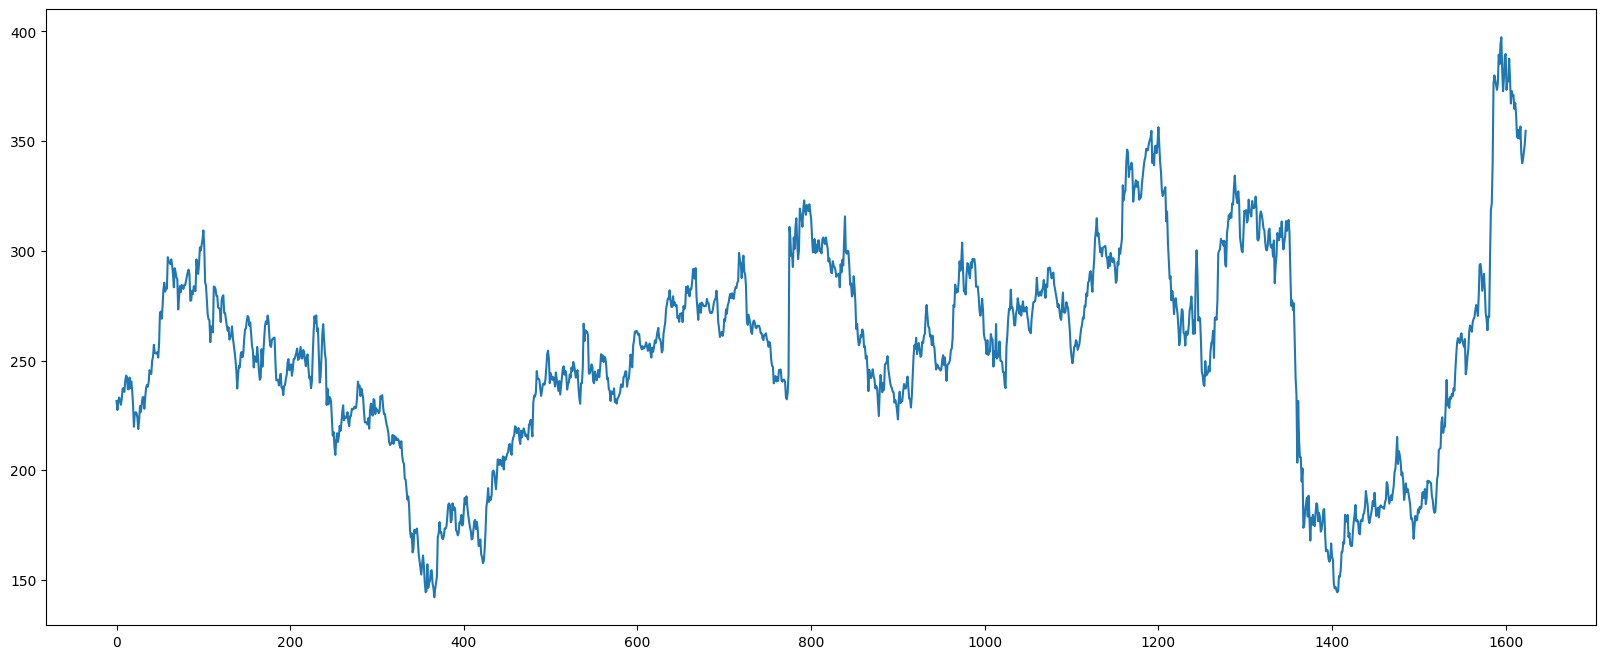

In [1028]:
plt.figure(figsize=(20, 8))
plt.plot(y_train)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


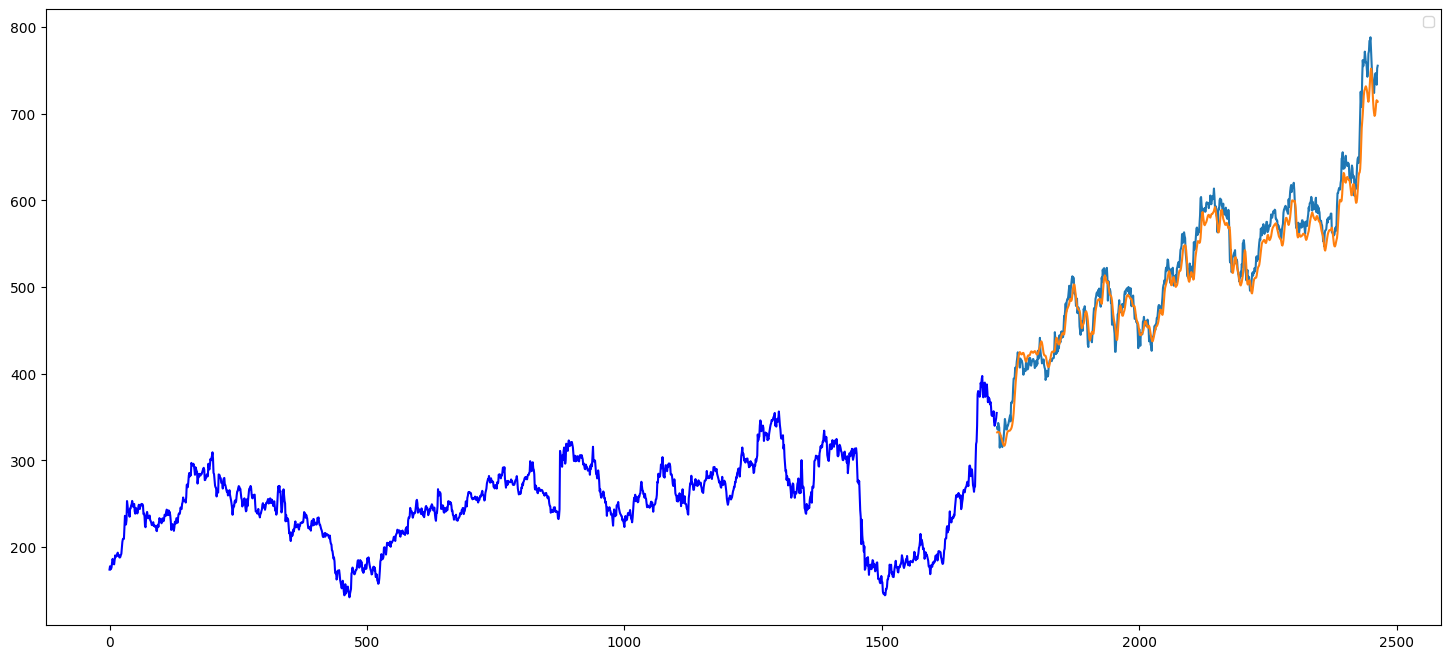

In [1035]:
import matplotlib.pyplot as plt

# Assuming graph_data contains the data for the second plot
# Determine the starting point for the second plot


# Plotting the first graph
plt.figure(figsize=(18, 8))
#y_train = np.append(np.array(data_train[:100]), y_train)
start_index = len(y_train)
plt.plot(y_train, 'b')

# Plotting the second graph with adjusted x-axis range
plt.plot(range(start_index, start_index + len(graph_data)), graph_data[['Test', 'Pred']])
plt.legend()

# Show plot
plt.show()


In [1030]:
data_train[:50]

,Close
0,174.059006
1,177.850586
2,174.293381
3,174.900055
4,176.701599
5,182.455612
6,186.412659
7,183.296661
8,180.529953
9,180.102539


In [1031]:
len(np.array(data_train[-100:]))

100